Este es código de prueba para R

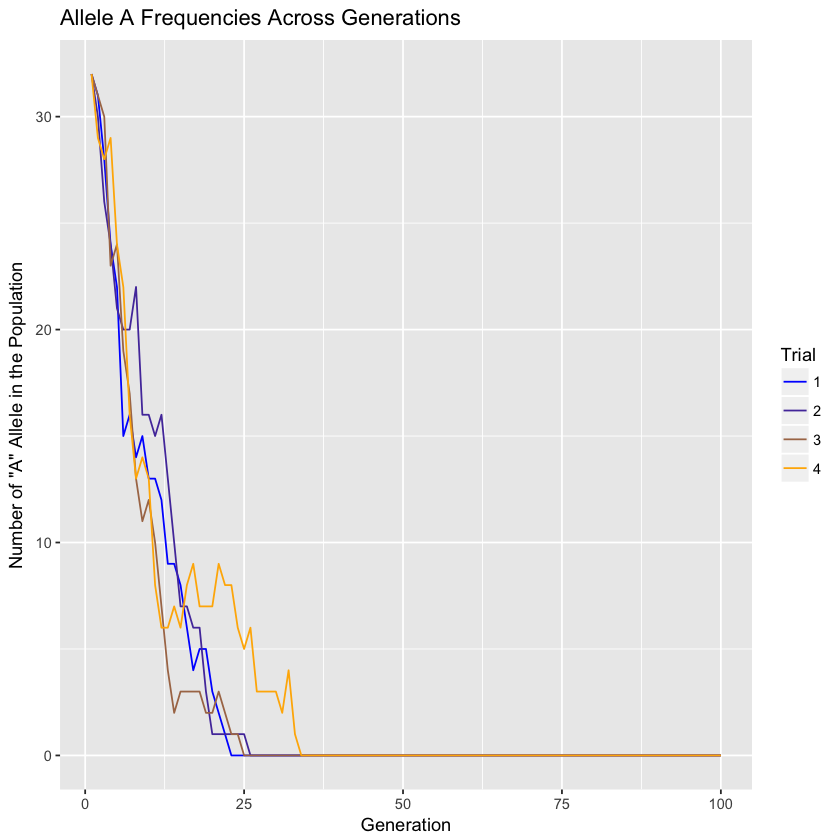

In [8]:
rm(list=ls())
library(ggplot2)
library(reshape2)

#Function Definition

#Bookkeeping 
calcAllelesInGeneration <- function(x) {
  AA = sum(x==1)
  AB = sum(x==2)
  BB = sum(x==3)
  #print(unlist(x))
  #print(c(AA, AB, BB))
  num.A <- (2 * AA)   + AB
  num.B <- (2 * BB)   + AB
  return(c(num.A, num.B))
}


#Given a parent individual, get one of their Alleles in the gamete
getGamete <- function(indiv, prob.big.A) {
  if (indiv == 1) return(1) #AA
  if (indiv == 3) return(0) #aa
  #if Parent is Aa, the gamete is one binomial trial with prob.big.A
  if (indiv == 2) return(rbinom(1, size=1, prob.big.A)) #Aa
}

#Two parental Gametes combine to form a zygote
combineGametes <- function(mg,dg) {
  if ((mg == 1) && (dg == 1)) return(1) #AA
  else if ((mg == 0) && (dg == 0)) return(3) #aa
  else  return(2) #Aa
}

#Given two individuals, get an offspring for next generation
getOffspring <- function(mom, dad,p) {
  momGam <- getGamete(mom,p)
  dadGam <- getGamete(dad,p)
  return(combineGametes(momGam, dadGam))  
}


getNextGen <- function(x, prob) {
  nextgen <- list()
  for(i in seq(1, kStartPop, by=2)) {
    firstborn <- getOffspring(x[i], x[i+1], prob)
    secondborn <- getOffspring(x[i], x[i+1], prob)
    nextgen[i] <- firstborn
    nextgen[i+1] <- secondborn  
  }
  return(unlist(nextgen))
}



simulationOneTrial <- function(start.pop, prob, knumGenerations, trial.index) {  
  df.allele <- NULL
  df.gen <- NULL
  
  #Keep track of the individuals in each generation
  df.gen <- rbind(df.gen, start.pop)
  
  x <- start.pop
  for ( gen in 1:knumGenerations) {
    #print(unlist(nex))
    #print(paste("Gen:", gen))
    numA <- calcAllelesInGeneration(x)
    df.gen <- rbind(df.gen, x)
    df.allele <- rbind(df.allele, c(gen, trial.index, numA))
    nex <- getNextGen(x, prob)
    x <- sample(nex) #shuffle the population for breeding  
  }
  
  return(as.data.frame(df.allele))
}

###plotting function
plotAllelesWithTime <- function(df, num.trials) {  
  colorRange<-colorRampPalette(c(rgb(0,0,1), rgb(1,0.7,0) ))
  p <- ggplot(df, aes(x= Generation, y= value, group=Trial, color=factor(Trial))) + geom_line()
  p <- p + scale_colour_manual(values = colorRange(num.trials),
                               name="Trial")  
  p <- p + labs(title = "Allele A Frequencies Across Generations")
  p <- p + ylab("Number of \"A\" Allele in the Population")
  return(p)
}


#-----------------------------

#RunTime Parameters
kStartPop <- 30
knumGenerations <- 100
knumTrials <- 4
prob.big.A <- 0.45
#-----------------------------



#Uniformly distribute AA, Aa and aa
start.pop <- sample(1:3, kStartPop, replace=TRUE)
df <- NULL
df1<- NULL

for (trial.index in 1: knumTrials) {
  df1 <- simulationOneTrial(start.pop, prob.big.A, knumGenerations, trial.index)
  df <- rbind(df1, df)
}
names(df) <- c("Generation", "Trial", "A", "a")  

#Melt and Plot
mdf <- melt(df, id=c("Generation", "Trial"), measure.vars = "A") #Keep only A allele in the molten data fram
plotAllelesWithTime(mdf, knumTrials)


Prueba para Python

Freqs counts: 
[1, 6, 15, 20, 15, 6, 1]


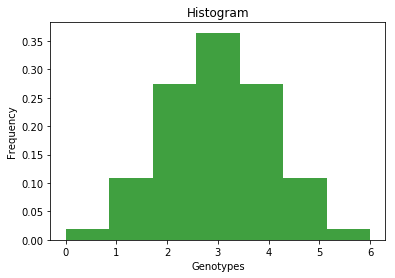

In [6]:
import itertools # para construir el "Cartesian product (with one iterable and itself)" http://stackoverflow.com/questions/104420/how-to-generate-all-permutations-of-a-list-in-python
import matplotlib.pyplot as plt # para el histograma
import numpy as np # para el histograma

# n alleles and m loci
alleles = 2
genes = 3

# obtener la lista de combinaciones de alelos de los genes con el producto cartesiano de si mismo
matrix_1 = list(itertools.product(range(alleles), repeat=genes))

result_matrix = []

# hacer la matriz por combinatoria del vector anterior dos veces
# hacerla como una lista de listas
for i in matrix_1:
    row_matrix = []
    for j in matrix_1:
        row_matrix.append(sum(i) + sum(j))
    result_matrix.append(row_matrix)
    row_matrix = []


# imprimir la matriz en pantalla
#print "Matrix: "
#for row in result_matrix:
#    print " ".join(str(e) for e in row)
#
#print ""

all_elems = [item for sublist in result_matrix for item in sublist] # ese arreglo bidimensional se llevo a unidimensiona; una sola lista con todo

variants = range(max(all_elems) + 1) # el numero de variantes


freqs = []
# conte las ocurrencias manualmente
for var in variants:
    freqs.append(all_elems.count(var))

print ("Freqs counts: ")
print (freqs)


# pero para el histograma no es necesario
plt.hist(all_elems,len(variants), normed=1, facecolor='green', alpha=0.75)
plt.title("Histogram")
plt.xlabel("Genotypes")
plt.ylabel("Frequency")
#plt.grid(True)

plt.show() # mostrar el histograma
